In [1]:
import sys
import os
import json
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader

sys.path.append('../src')


from utils.data_loader import CloudDataset, MultiFolderDataset, CloudTestDataset

Transformações e Normalização

In [2]:
# Médias e desvios padrão calculados anteriormente
mean = [0.29697557, 0.29690879, 0.29623264]
std = [0.19810056, 0.19796892, 0.19816074]

# Transformações para as imagens
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Transformações para as máscaras
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

Criando o Dataset de Treinamento

In [3]:
# Diretórios dos dados processados
processed_images_dir = '../data/processed/38-Cloud/images/train/'
processed_masks_dir = '../data/processed/38-Cloud/masks/train/'

# Diretórios dos dados aumentados
augmented_images_dir = '../data/processed/38-Cloud/images/train_augmented/'
augmented_masks_dir = '../data/processed/38-Cloud/masks/train_augmented/'

# Diretório das imagens de teste processadas
processed_test_images_dir = '../data/processed/38-Cloud/images/test/'

# Diretório das divisões
splits_dir = '../data/processed/38-Cloud/splits/'

# Carregando as listas de arquivos
with open(os.path.join(splits_dir, 'train_files_augmented.json'), 'r') as f:
    train_files_augmented = json.load(f)
with open(os.path.join(splits_dir, 'val_files.json'), 'r') as f:
    val_files = json.load(f)
with open(os.path.join(splits_dir, 'test_files.json'), 'r') as f:
    test_files = json.load(f)

In [4]:
# Combinar os diretórios e listas de arquivos
train_images_dirs = [processed_images_dir, augmented_images_dir]
train_masks_dirs = [processed_masks_dir, augmented_masks_dir]

train_files_processed = train_files_augmented  # Lista de arquivos com imagens originais e aumentadas

Instanciando o Dataset de Treinamento

In [5]:
# Criando o Dataset de Treinamento
train_dataset = MultiFolderDataset(
    images_dirs=train_images_dirs,
    masks_dirs=train_masks_dirs,
    file_list=train_files_augmented,
    image_transform=image_transform,
    mask_transform=mask_transform
)

Criando o DataLoader de Treinamento

In [6]:
batch_size = 32

# DataLoader de Treinamento
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=4  
)

Criando os DataLoaders de Validação e Teste

In [7]:
# Dataset de Validação
val_dataset = CloudDataset(
    images_dir=processed_images_dir,
    masks_dir=processed_masks_dir,
    file_list=val_files,
    image_transform=image_transform,
    mask_transform=mask_transform
)

# DataLoader de Validação
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

Instanciando o Dataset de Teste

In [8]:
# Dataset de Teste usando CloudTestDataset (sem máscaras)
test_dataset = CloudTestDataset(
    images_dir=processed_test_images_dir,
    file_list=test_files,
    image_transform=image_transform
)

# DataLoader de Teste
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4
)

Visualizando Algumas Amostras

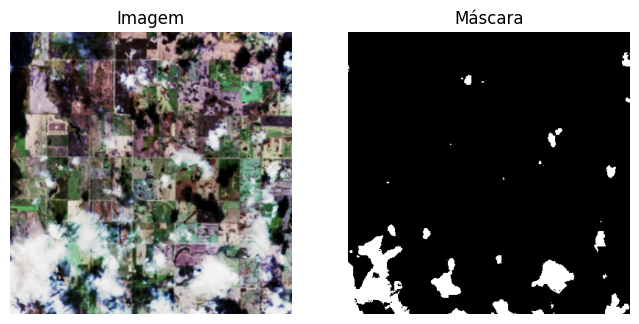

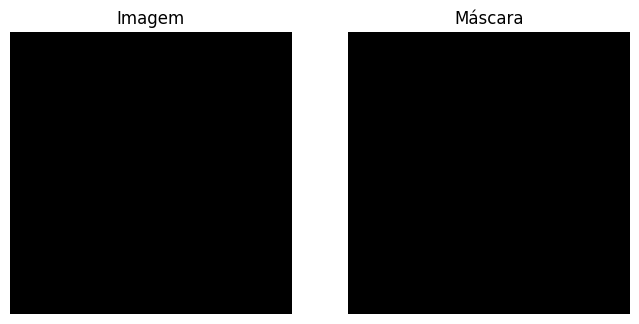

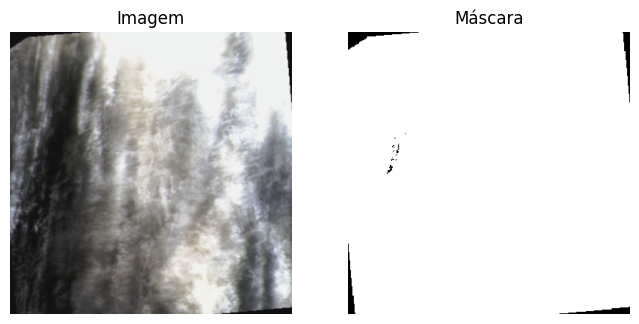

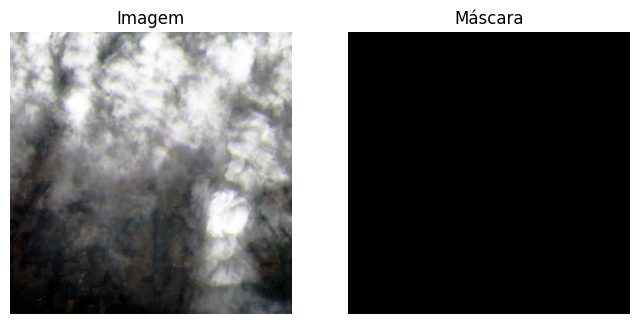

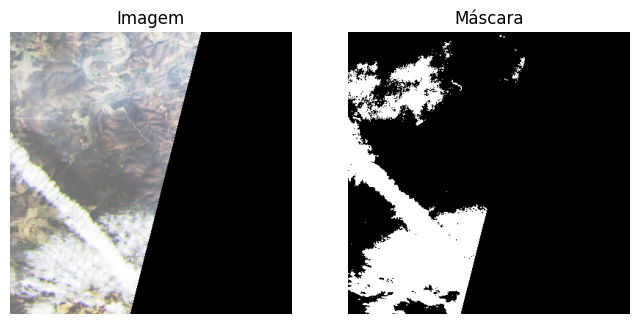

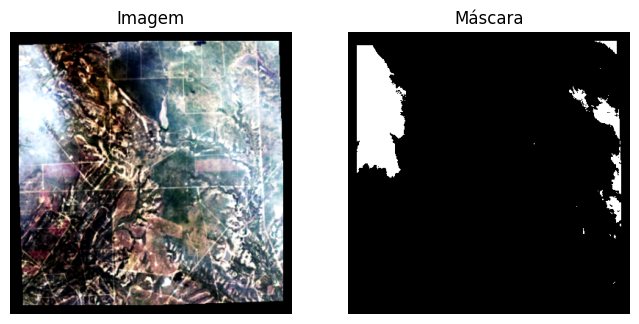

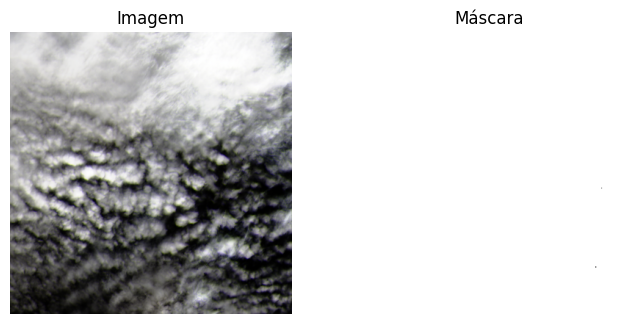

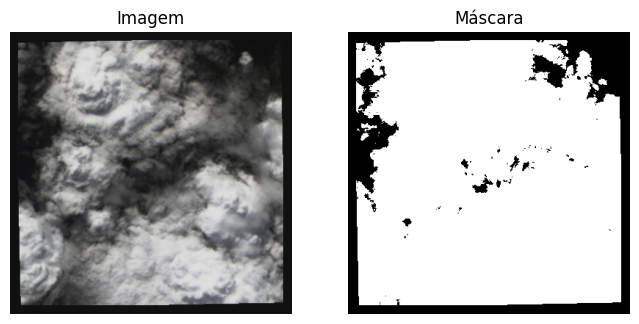

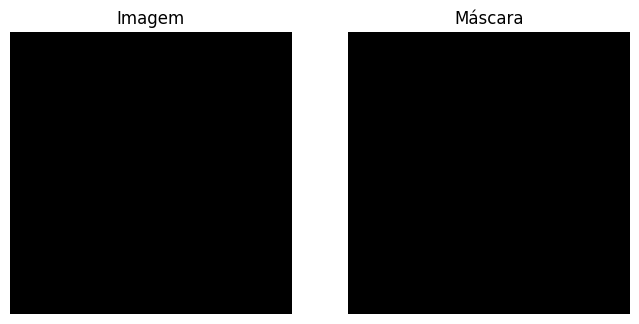

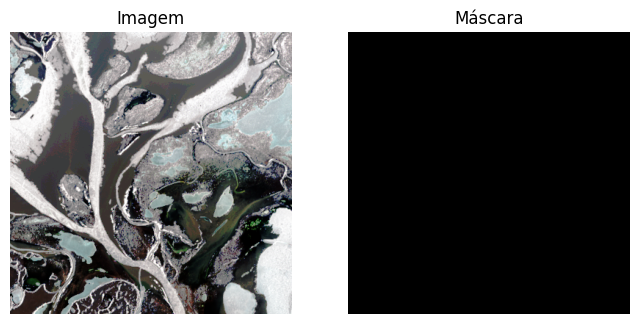

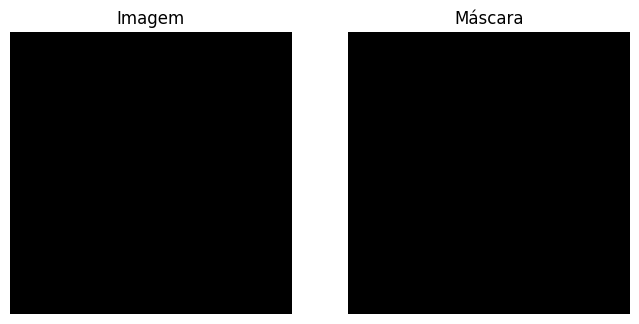

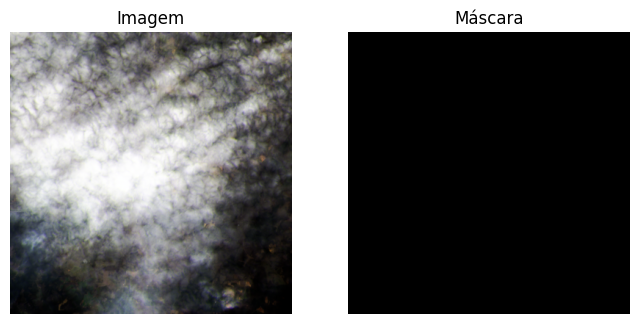

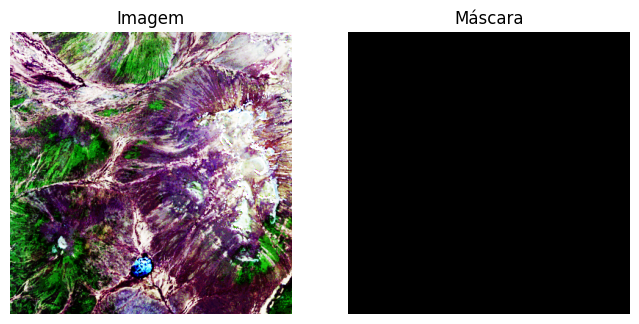

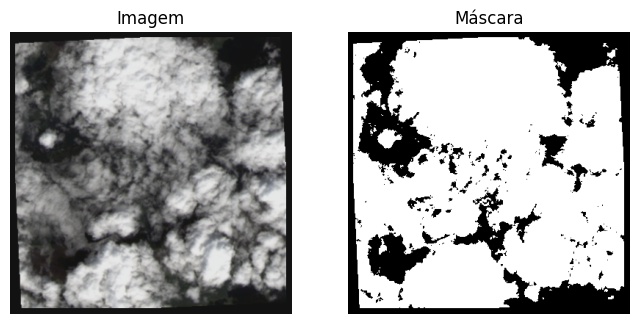

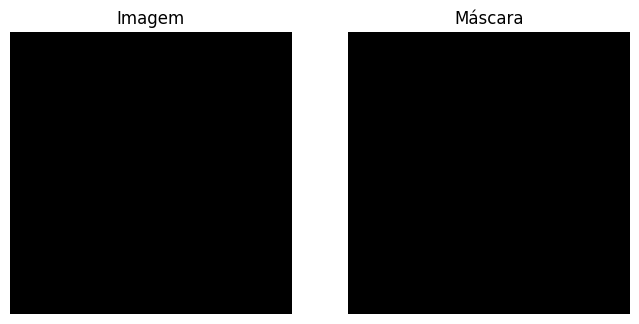

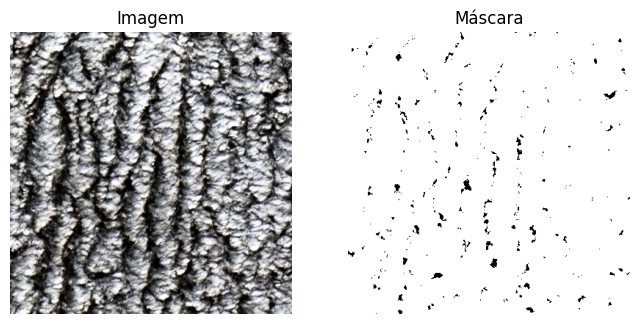

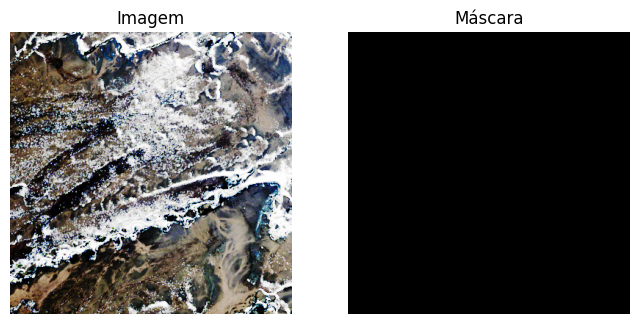

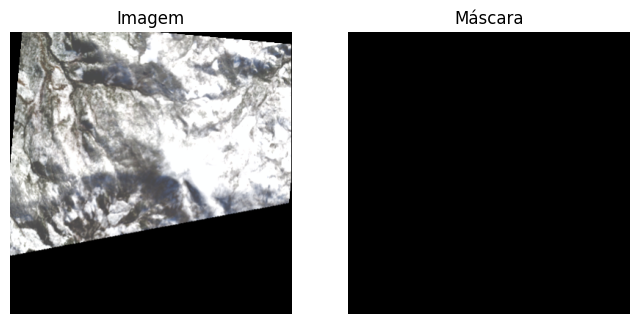

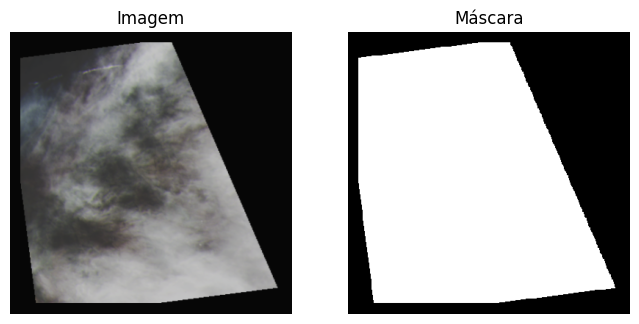

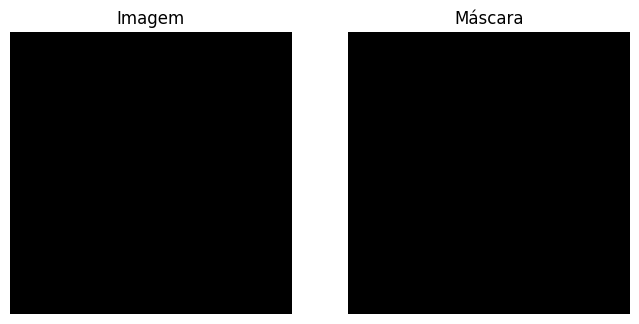

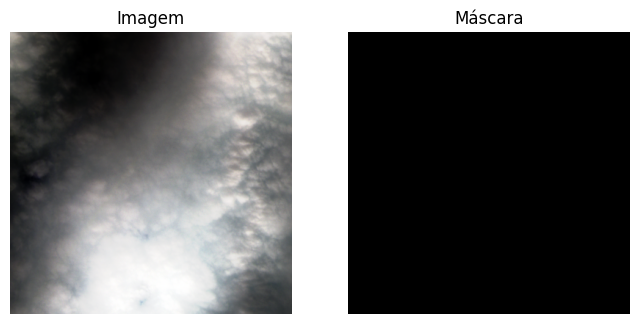

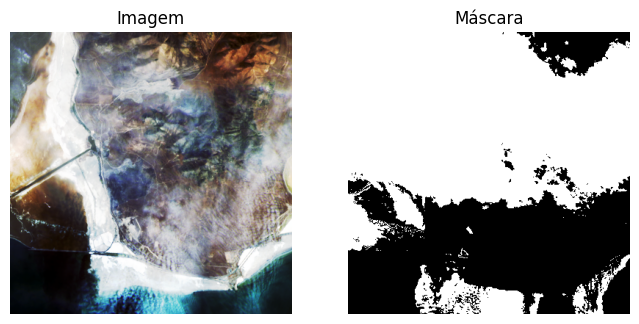

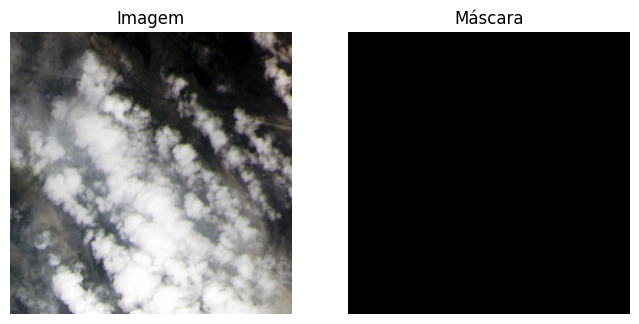

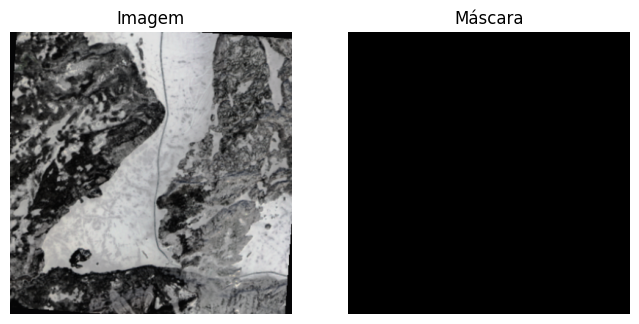

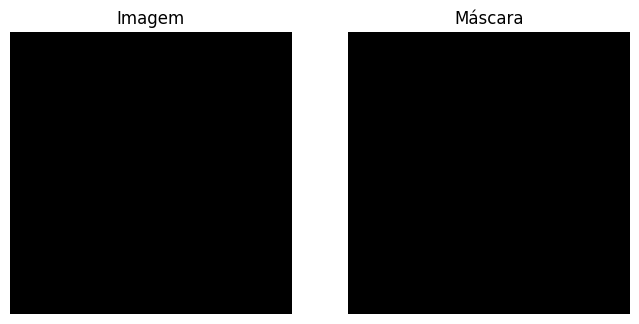

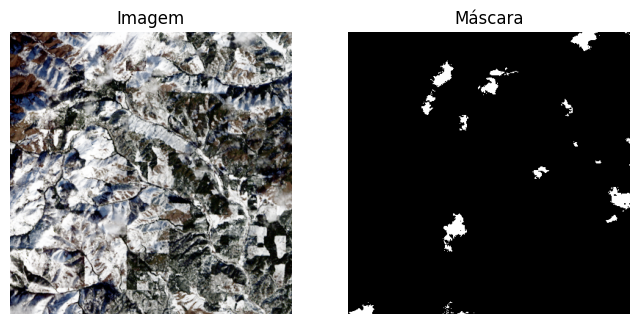

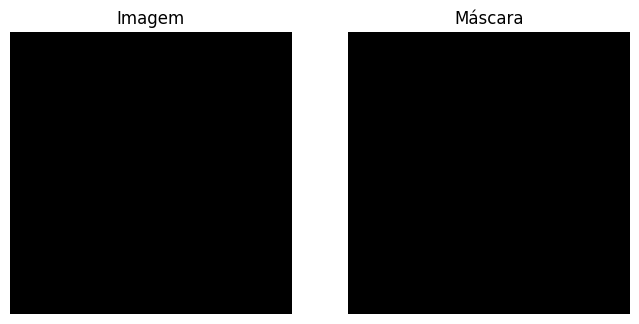

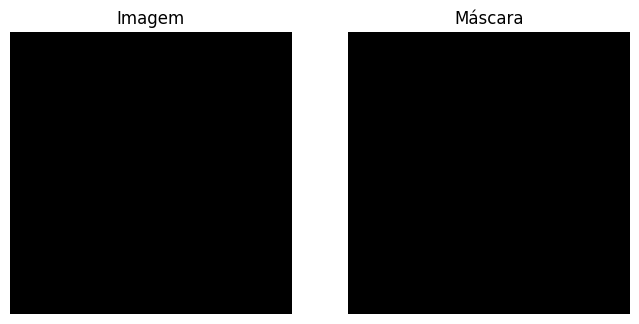

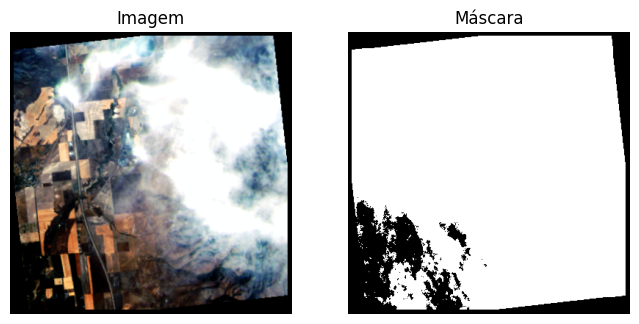

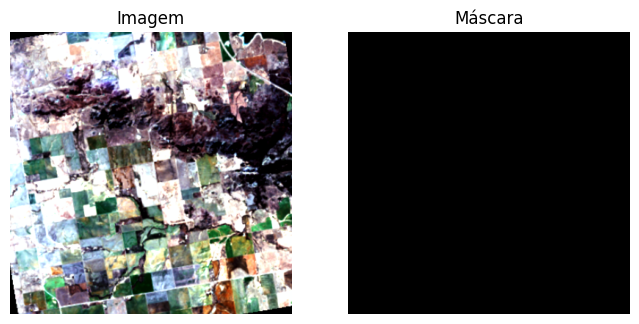

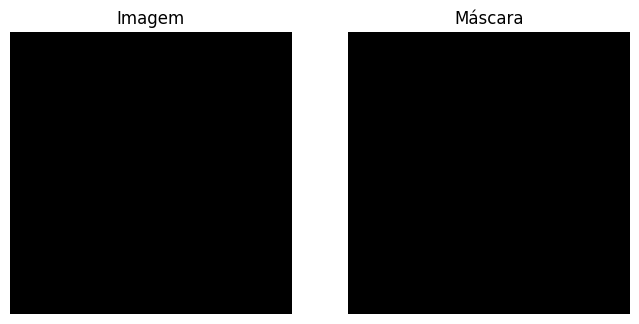

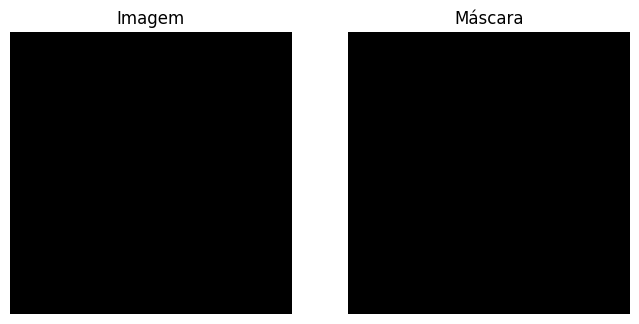

In [9]:
import matplotlib.pyplot as plt

def visualize_batch(images, masks):
    batch_size = images.size(0)
    images = images.permute(0, 2, 3, 1)  # Rearranjar para (batch_size, H, W, C)
    for i in range(batch_size):
        image = images[i].numpy()
        image = (image * std) + mean  # Desnormalizar
        image = np.clip(image, 0, 1)
        mask = masks[i].numpy().squeeze()
        
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Imagem')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Máscara')
        plt.axis('off')

        plt.show()

# Obter um lote de treinamento
images, masks = next(iter(train_loader))
visualize_batch(images, masks)